In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
# Load dataset
df = pd.read_csv('Ayurveda Sheet - Sheet2.csv')

In [181]:
df.shape

(999, 77)

In [182]:
df.drop_duplicates(inplace=True)

In [183]:
# Remove columns where all rows contain 0
df = df.loc[:, (df != 0).any(axis=0)]

In [184]:
df.shape

(815, 76)

In [185]:
df.drop(['Dosha', 'Risk','prognosis'], axis=1, inplace=True)

In [186]:
df.head()

,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,Less_of_appetite,...,Painful urination,Frequent urge to urinate,Cloudy or strong-smelling urine,Pelvic pain,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Medicine
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."


In [187]:
df.isnull().sum()

Sneezing            0
Runny_Nose          0
Headache            0
High Fever          0
Bodyache            0
                   ..
Sweating            0
Hair loss           0
Photosensitivity    0
Oral ulcers         0
Medicine            3
Length: 73, dtype: int64

In [188]:
# Remove rows with missing data in the 'Medice' column
df = df.dropna(subset=['Medicine'])

In [189]:
df['Medicine'].unique()

array(['Turmeric and honey mixture, Ginger tea, Black pepper and honey',
       'Ginger and turmeric tea, Castor oil packs on affected joints',
       'Ginger and turmeric drink, Honey and garlic mixture, Massage with mustard oil',
       'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage, Trigger Point Massage, Cobra Yoga asana',
       'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage, Cobra Yoga asana',
       'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage',
       'Oil Massage, Trigger Point Massage, Hot bundle Massage, Garlic and Pepper boiled drink',
       'Heat Therapy, Hot bundle massage, Garlic and Pepper boiled drink',
       'Anis_Coriander_Garlic_Pepper boiled water drink, Heat Therapy, Hot bundle massage, Oil Application',
       'marmoles juice', 'Ginger_Coriander Drink',
       'Paspanguwa, Ginger_Coriander Drink',
       'Ginger_Coriander Drink, Steaming with Salt',
       'Paspanguwa, Ginger_

In [190]:
unique_count = len(df['Medicine'].unique())
print(unique_count)

49


In [191]:
############### Label Encode the data ####################
Encode_df = LabelEncoder()

In [192]:
df['Medicine'] = Encode_df.fit_transform(df['Medicine'])

In [193]:
mapping = dict(zip(Encode_df.classes_, Encode_df.transform(Encode_df.classes_)))
print(mapping)

{'Aloe vera extract, Coriander Water, King Coconut, Bee Honey': 0, 'Anis_Coriander_Garlic_Pepper boiled water drink, Heat Therapy, Hot bundle massage, Oil Application': 1, 'Anise Water, Coriander Water': 2, 'Apply cold pads on closed eyelids (Can use Aloevera Jell)': 3, 'Bitter gourd juice,Cinnamon water': 4, 'Boiled unripe papaya, marmelos juice, Eat immature and Soft king coconut shell, Oats Porridge, King Coconut Water, Boiled Barley, Fresh Milk with Sugar, Hathawariya Tea, Ginger_Lime Extract with Bee Honey, Rice Porridge, Anise Water, Aloe vera Juice, Coriander Water, Gee': 5, 'Caster Oil, Aloe vera Juice, Marmelos Juice or Extract, Avocado, Boiled unripe papaya, Sit in a Salty hot Water Bath': 6, 'Cranberry juice, Coriander seed water, Barley water, Coconut water': 7, 'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage': 8, 'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage, Cobra Yoga asana': 9, 'Garlic and Pepper boiled drink, oil 

In [194]:
df[['Medicine']].head()

,Medicine
0,45
1,45
4,45
5,45
8,45


In [195]:
df['Medicine'].value_counts(ascending=True)

Medicine
20     1
12     1
42     1
39     1
41     1
27     1
35     1
0      1
6      1
34     1
2      1
3      1
24     1
18     2
28     2
8      2
48     2
32     3
31     3
19     3
16     4
1      4
40     4
9      5
22     6
25     6
30     9
44    11
43    12
15    12
17    14
33    18
5     19
21    21
38    21
26    23
46    25
36    28
11    32
7     32
47    32
23    40
37    41
13    42
10    52
14    54
4     55
29    64
45    96
Name: count, dtype: int64

In [196]:
class_counts = df['Medicine'].value_counts()

In [197]:
dfs_concat = []

In [198]:
for class_label, count in class_counts.items():
    if count < 10:
        dfs_concat.append(df[df['Medicine'] == class_label])
    else:

        dfs_concat.append(df[df['Medicine'] == class_label].sample(10))

In [199]:
testing_df = pd.concat(dfs_concat)

In [200]:
if len(testing_df) < 300:
    additional_samples_needed = 300 - len(testing_df)
    remaining_data = df.drop(testing_df.index)
    additional_samples = remaining_data.sample(additional_samples_needed)
    testing_df = pd.concat([testing_df, additional_samples])

In [201]:
testing_df.reset_index(drop=True, inplace=True)

In [202]:
testing_df.head()

,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,Less_of_appetite,...,Painful urination,Frequent urge to urinate,Cloudy or strong-smelling urine,Pelvic pain,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Medicine
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45


In [203]:
testing_df['Medicine'].value_counts()

Medicine
23    13
21    11
10    11
37    11
7     11
11    11
29    11
33    11
26    11
5     11
45    10
44    10
15    10
43    10
17    10
36    10
38    10
46    10
47    10
13    10
14    10
4     10
30     9
22     6
25     6
9      5
1      4
40     4
16     4
32     3
31     3
19     3
18     2
48     2
28     2
8      2
24     1
20     1
27     1
35     1
42     1
39     1
12     1
3      1
34     1
2      1
6      1
41     1
0      1
Name: count, dtype: int64

In [204]:
testing_df.shape

(300, 73)

In [205]:
X_train = df.drop(['Medicine'], axis=1)
y_train = df['Medicine']
##############################################
X_test = testing_df.drop('Medicine', axis=1)
y_test = testing_df['Medicine']

In [206]:
RF_model = RandomForestClassifier(random_state=42)

In [207]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
y_pred = RF_model.predict(X_test)

In [209]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [210]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        11
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00        11
           8       0.50      1.00      0.67         2
           9       1.00      0.40      0.57         5
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.73      0.80      0.76        10
          16       1.00      

In [211]:
cm = confusion_matrix(y_test, y_pred)

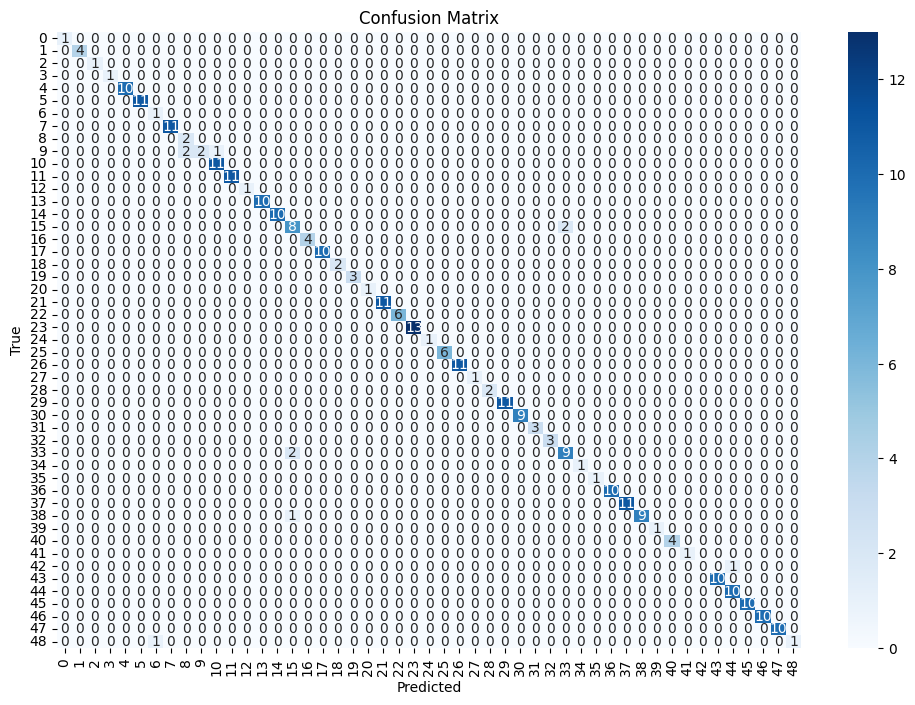

In [212]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [213]:
import pickle

# Save the trained model to a file
with open('model_medicine.pkl', 'wb') as file:
    pickle.dump(RF_model, file)

In [214]:
with open('label_encoder_medicine.pkl', 'wb') as file:
    pickle.dump(Encode_df, file)